In [6]:
import datetime
from IPython.display import Image
import os
import kraken
from kraken import pageseg
from kraken.binarization import nlbin
from PIL import Image, ImageDraw

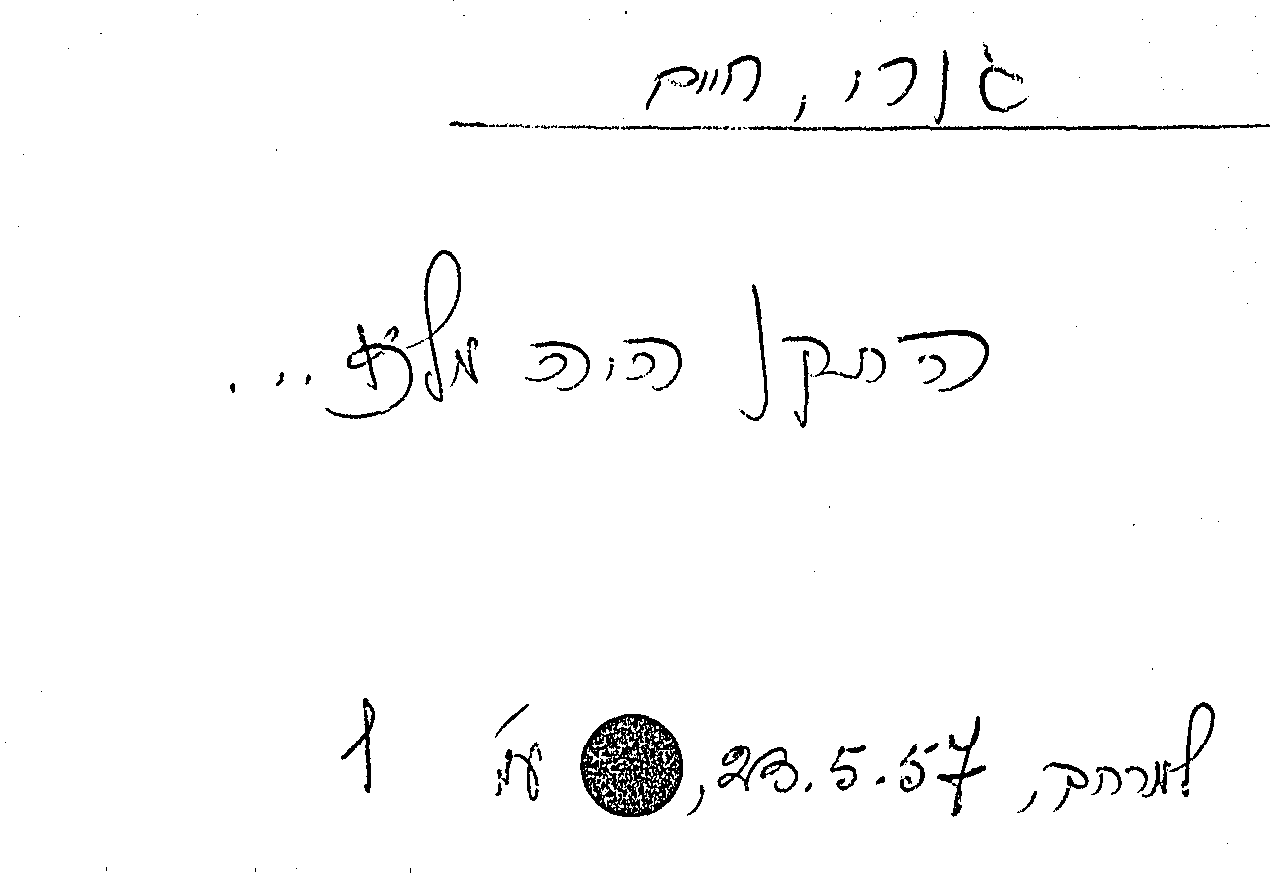

In [2]:
Image.open('Images/IDGNAZIM0001.tif')

In [11]:
if __name__ == '__main__':
    image_directory = 'Images'
    for image_file in os.listdir(image_directory)[-1:]:
        image_path = os.path.join(image_directory, image_file)
        kraken.pageseg.segment(image_path)

AttributeError: 'str' object has no attribute 'mode'

In [4]:
#show the segmentation result text regions
def segment_image(image_path):
    # Binarize the image
    im = Image.open(image_path)
    bin_im = nlbin(im)

    # Segment the page into text regions
    segments = pageseg.segment(bin_im)['boxes']

    # Draw rectangles around the segments
    draw = ImageDraw.Draw(im)
    for box in segments:
        draw.rectangle(box, outline='red')

    # Display the image with segments
    im.show()

if __name__ == '__main__':
    image_directory = 'Images'
    for image_file in os.listdir(image_directory)[-1:]:
        image_path = os.path.join(image_directory, image_file)
        segment_image(image_path)


TypeError: 'Segmentation' object is not subscriptable

In [30]:
from PIL import Image, ImageDraw

# Initialize the image filename
image_filename = 'Images/IDGNAZIM0001.tif'

# Define the coordinates for the rectangle
# Example: [(0, 0), (1222, 0), (0, 735), (1222, 735)]
# We need only the top-left and bottom-right corners for a rectangle
rectangle_coords = [(229, 288), (1077, 396)]# [229, 288, 1077, 396], [494, 702, 1214, 817]]#[(0, 0), (1222, 735)]

# Load the image
image = Image.open(image_filename)

# Convert the image to RGB mode if it's not
if image.mode != 'RGB':
    image = image.convert('RGB')

# Create a drawing context
draw = ImageDraw.Draw(image)

# Draw the rectangle
# The rectangle function expects the top-left and bottom-right corners as input
draw.rectangle([rectangle_coords[0], rectangle_coords[1]], outline="red", width=3)

# Display the image with the drawn rectangle
image.show()


In [12]:
image = Image.open('Images/IDGNAZIM0001.tif')

In [25]:
draw = ImageDraw.Draw(image)
draw.rectangle([(100,100), (300,100)], outline='green', width=3)
image.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\cuda_env\lib\site-packages\PIL\ImageDraw.py", line 843, in Draw
    max(bbox[3], bbox_line[3]),
AttributeError: 'TiffImageFile' object has no attribute 'getdraw'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\User\AppData\Local\Temp\ipykernel_19424\3099345399.py", line 1, in <module>
    draw = ImageDraw.Draw(image)
  File "C:\Users\User\anaconda3\envs\cuda_env\lib\site-packages\PIL\ImageDraw.py", line 845, in Draw
  File "C:\Users\User\anaconda3\envs\cuda_env\lib\site-packages\PIL\ImageDraw.py", line 62, in __init__
    defaults to the mode of the image.
  File "C:\Users\User\anaconda3\envs\cuda_env\lib\site-packages\PIL\TiffImagePlugin.py", line 1210, in load
   

In [19]:
image.close()

In [18]:

draw = ImageDraw.Draw(im)
for box in segments:
    draw.rectangle(box, outline='red')

# Display the image with segments
im.show()

NameError: name 'im' is not defined

______________

## Step 1: Training from data generated from fonts

Here, the model trains on two fonts at the same time. A comparison of the start and completion times shows that this training step completes in just over three and a half hours. The final accuracy rate for these fonts is measured at 99.787%.

In [2]:
print('Time at start of below:\n\t',datetime.datetime.now())

Time at start of below:
	 2019-09-16 23:03:10.300101


In [3]:
!ketos train -o out/1/model from-font/*/*.png

Building training set  [####################################]  100%
[1.8084] alphabet mismatch: chars in training set only: {'آ', 'ٰ', 'ؤ'} (not included in accuracy test during training) 
Initializing model ✓
stage 1/∞  [####################################]  2473/2473          Accuracy report (1) 0.9509 18797 922
stage 2/∞  [####################################]  2473/2473           Accuracy report (2) 0.9842 18797 297
stage 3/∞  [####################################]  2473/2473           Accuracy report (3) 0.9911 18797 168
stage 4/∞  [####################################]  2473/2473            Accuracy report (4) 0.9945 18797 103
stage 5/∞  [####################################]  2473/2473            Accuracy report (5) 0.9948 18797 97
stage 6/∞  [####################################]  2473/2473            Accuracy report (6) 0.9962 18797 72
stage 7/∞  [####################################]  2473/2473            Accuracy report (7) 0.9963 18797 69
stage 8/∞  [######################

In [4]:
print('Time at completion of above:\n\t',datetime.datetime.now())

Time at completion of above:
	 2019-09-17 02:37:29.690339


_____________

## Step 2: Testing and Refining on Text A

I first run a test of the model produced above on the training data I have already transcribed for Text A. The current model has an accuracy of 89.54% on this new data.

I then refine the model with 5 pages of new training data from Text A. You can see below that this takes about five minutes (it is much less training data than above) and the updated model reaches an accuracy of 97.38% on this new data.

I refine the model one more time with 5 more pages of new training data from Text A, taking another five minutes to train and reaching an accuracy rate of 99.097% (!!).

In [6]:
!ketos test -m out/1/model_best.mlmodel phaenomena/5pgs/*.png

Loading model out/1/model_best.mlmodel	✓
Evaluating out/1/model_best.mlmodel
Evaluating  [####################################]  100%          
=== report  ===

5421	Characters
567	Errors
89.54%	Accuracy

193	Insertions
155	Deletions
219	Substitutions

Count	Missed	%Right
3931	282	92.83%	Arabic
1450	112	92.28%	Common
40	18	55.00%	Inherited

Errors	Correct-Generated
34	{  } - { SPACE }
29	{  } - { ـ }
25	{ SPACE } - {  }
19	{ ت } - {  }
16	{ م } - {  }
14	{ أ } - { ARABIC FATHATAN }
14	{  } - { ا }
14	{ ( } - { &#34; }
14	{ ) } - {  }
14	{ ـ } - {  }
13	{  } - { س }
13	{ أ } - { ا }
11	{  } - { ARABIC SHADDA }
11	{ ث } - { ت }
11	{ ARABIC FATHATAN } - {  }
11	{ إ } - { ا }
10	{  } - { ت }
9	{  } - { ه }
9	{ ر } - { ز }
8	{ ؤ } - { و }
7	{ ح } - {  }
7	{ ب } - {  }
7	{ ج } - { ح }
5	{  } - { ل }
5	{ ر } - {  }
5	{ ه } - {  }
5	{ . } - {  }
5	{ ر } - { و }
5	{ . } - { SPACE }
5	{ : } - {  }
5	{ ( } - { ا }
5	{ ن } - {  }
4	{ غ } - { ف }
4	{ ث } - {  }
4	{  } - { ن }
4	{ ١ } - {  }
4	{  } 

In [8]:
print('Time at start of below:\n\t',datetime.datetime.now())

Time at start of below:
	 2019-09-17 02:37:39.121380


In [9]:
!ketos train --resize add -i out/1/model_best.mlmodel -o out/2/model phaenomena/5pgs/*.png

Building training set  [####################################]  100%          
[5.2477] alphabet mismatch: chars in training set only: {'٩', '٢', '/', '—', '-', 'ظ', 'َ', 'ؤ', '"', '١', 'ئ', 'ـ', 'ُ', 'ِ', '٥', 'ء'} (not included in accuracy test during training) 
[5.2478] alphabet mismatch: chars in validation set only: {'∴'} (not trained) 
Network codec not compatible with training set
Adding missing labels to network ✓
stage 1/∞  [####################################]  98/98          Accuracy report (1) 0.9498 458 23
stage 2/∞  [####################################]  98/98          Accuracy report (2) 0.9585 458 19
stage 3/∞  [####################################]  98/98          Accuracy report (3) 0.9607 458 18
stage 4/∞  [####################################]  98/98          Accuracy report (4) 0.9651 458 16
stage 5/∞  [####################################]  98/98          Accuracy report (5) 0.9629 458 17
stage 6/∞  [####################################]  98/98          Accuracy 

In [10]:
print('Time at completion of above:\n\t',datetime.datetime.now())

Time at completion of above:
	 2019-09-17 02:41:34.895214


In [11]:
print('Time at start of below:\n\t',datetime.datetime.now())

Time at start of below:
	 2019-09-17 02:41:34.912302


In [12]:
!ketos train --resize add -i out/2/model_best.mlmodel -o out/3/model phaenomena/n5pgs/*.png

Building training set  [####################################]  100%          
[4.6845] alphabet mismatch: chars in training set only: {'ْ', '٣', '٧', '٥', 'َ', 'ٌ', '٨', '٤', '٢', '∴', 'ش', 'ء', ']', 'ؤ', 'ً', 'ئ', 'ِ'} (not included in accuracy test during training) 
Network codec not compatible with training set
Adding missing labels to network ✓
stage 1/∞  [####################################]  90/90          Accuracy report (1) 0.9838 554 9
stage 2/∞  [####################################]  90/90          Accuracy report (2) 0.9856 554 8
stage 3/∞  [####################################]  90/90          Accuracy report (3) 0.9838 554 9
stage 4/∞  [####################################]  90/90          Accuracy report (4) 0.9856 554 8
stage 5/∞  [####################################]  90/90          Accuracy report (5) 0.9856 554 8
stage 6/∞  [####################################]  90/90          Accuracy report (6) 0.9892 554 6
stage 7/∞  [####################################]  90/9

In [13]:
print('Time at completion of above:\n\t',datetime.datetime.now())

Time at completion of above:
	 2019-09-17 02:45:25.715138


_____________

## Step 3: Testing and Refining on Text B

I have one other text with a typeface that, though similar, is more distant than Text A's typeface. Below, I test both the original model and the refined model from above on training data I have transcribed from Text B.

Initial accuracy rates are lower: the original model has 74.18% accuracy, while the refined model has 80.24% accuracy.

Retraining the refined model on Text B's training data brings this up to a new accuracy of 95.97% in ten minutes. I ended my experiment here, but further rounds of training (as I did above for Text A) could plausibly push this even higher.

In [15]:
!ketos test -m out/1/model_best.mlmodel hyderabad/training_data/*.png

Loading model out/1/model_best.mlmodel	✓
Evaluating out/1/model_best.mlmodel
Evaluating  [####################################]  100%          
=== report  ===

18113	Characters
4676	Errors
74.18%	Accuracy

1149	Insertions
1685	Deletions
1842	Substitutions

Count	Missed	%Right
14062	2179	84.50%	Arabic
4051	812	79.96%	Common

Errors	Correct-Generated
1176	{  } - { SPACE }
315	{ SPACE } - {  }
194	{ - } - { ـ }
169	{ م } - {  }
100	{ - } - {  }
93	{ ل } - { ا }
86	{ ي } - {  }
78	{ ا } - { أ }
73	{ ا } - { SPACE }
59	{ ا } - {  }
59	{ ر } - { ز }
57	{ ا } - { ] }
50	{ ل } - {  }
48	{  } - { ه }
47	{  } - { ا }
46	{ ر } - {  }
45	{  } - { ] }
44	{ م } - { د }
44	{ م } - { ه }
42	{ ر } - { SPACE }
40	{ ع } - {  }
40	{ آ } - { ا }
38	{  } - { ARABIC SHADDA }
36	{  } - { ن }
35	{ خ } - { ن }
35	{ ن } - {  }
34	{ م } - { SPACE }
32	{  } - { ل }
32	{ ن } - { ARABIC SHADDA }
29	{ ب } - { ي }
27	{ . } - { SPACE }
26	{  } - { م }
24	{ خ } - { SPACE }
23	{ . } - { ه }
23	{  } - { أ }
21	{ ب } - { 

In [18]:
!ketos test -m out/3/model_best.mlmodel hyderabad/training_data/*.png

Loading model out/3/model_best.mlmodel	✓
Evaluating out/3/model_best.mlmodel
Evaluating  [####################################]  100%          
=== report  ===

18113	Characters
3579	Errors
80.24%	Accuracy

1374	Insertions
1066	Deletions
1139	Substitutions

Count	Missed	%Right
14062	1859	86.78%	Arabic
4051	654	83.86%	Common

Errors	Correct-Generated
818	{  } - { SPACE }
380	{ SPACE } - {  }
175	{ م } - {  }
103	{ - } - { ـ }
93	{ ي } - {  }
90	{ ع } - {  }
74	{ - } - {  }
70	{ ل } - { ا }
69	{ ل } - {  }
64	{ ا } - {  }
60	{ خ } - { ن }
48	{ س } - {  }
40	{ ر } - {  }
33	{ خ } - { ح }
32	{ ت } - {  }
32	{ ن } - {  }
32	{ آ } - { ا }
31	{ ع } - { م }
26	{  } - { ن }
26	{  } - { ا }
25	{ ث } - {  }
24	{ ا } - { SPACE }
24	{ م } - { . }
23	{ ف } - {  }
23	{ . } - { SPACE }
23	{ ق } - { ت }
22	{ آ } - {  }
21	{ ث } - { ك }
20	{ ا } - { أ }
20	{ ى } - {  }
20	{  } - { ر }
19	{ ا } - { ل }
18	{ م } - { SPACE }
18	{ ب } - {  }
18	{ م } - { ه }
18	{ ر } - { SPACE }
17	{ خ } - {  }
17	{ ن } - {

In [20]:
print('Time at start of below:\n\t',datetime.datetime.now())

Time at start of below:
	 2019-09-17 02:46:24.507642


In [21]:
!ketos train --resize add -i out/3/model_best.mlmodel -o out/4/model hyderabad/training_data/*.png

Building training set  [####################################]  100%          
Building validation set  [####################################]  100%          
[16.2385] alphabet mismatch: chars in training set only: {'٧', 'غ', '٦', 'أ', '٩', '٠', 'ء'} (not included in accuracy test during training) 
Network codec not compatible with training set
Adding missing labels to network ✓
stage 1/∞  [####################################]  361/361          Accuracy report (1) 0.9280 1737 125
stage 2/∞  [####################################]  361/361          Accuracy report (2) 0.9349 1737 113
stage 3/∞  [####################################]  361/361          Accuracy report (3) 0.9476 1737 91
stage 4/∞  [####################################]  361/361          Accuracy report (4) 0.9499 1737 87
stage 5/∞  [####################################]  361/361          Accuracy report (5) 0.9522 1737 83
stage 6/∞  [####################################]  361/361          Accuracy report (6) 0.9597 1737 7

In [22]:
print('Time at completion of above:\n\t',datetime.datetime.now())

Time at completion of above:
	 2019-09-17 02:56:49.801231
